In [1]:
datafile = r'C:\Users\HP\Downloads\dataas3\Grocery_Items_35.csv'

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

data= pd.read_csv(datafile)

# Drop any columns with NaN values
g_df = [row.dropna().tolist() for index, row in data.iterrows()]

# Convert the DataFrame into a transaction format using TransactionEncoder
transen = TransactionEncoder()
transen_array = transen.fit(g_df).transform(g_df)

df = pd.DataFrame(transen_array, columns=transen.columns_)
df.head()

d:\Users\rakesh\anacondainstall\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False      True             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False                True   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False   False     False  
2       False        True   False     False  
3       False       False   False     False  
4       False        True   False     False  

[5 rows x 165 columns]

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules

items = apriori(df, min_support=0.01, use_colnames=True)
association_rules(items, metric="confidence", min_threshold=0.1)

antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.120625            0.155875   
1        (rolls/buns)  (whole milk)            0.110875            0.155875   
2              (soda)  (whole milk)            0.100250            0.155875   
3            (yogurt)  (whole milk)            0.084875            0.155875   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.01275    0.105699  0.678104 -0.006052    0.943894      -0.350571  
1  0.01300    0.117249  0.752200 -0.004283    0.956244      -0.270347  
2  0.01300    0.129676  0.831922 -0.002626    0.969897      -0.183371  
3  0.01025    0.120766  0.774761 -0.002980    0.960068      -0.241093

     msv    mct  count
0  0.001  0.050    500
1  0.001  0.075    288
2  0.001  0.100    147
3  0.005  0.050     59
4  0.005  0.075     41
5  0.005  0.100     24
6  0.010  0.050      8
7  0.010  0.075      7
8  0.010  0.100      4


<AxesSubplot:xlabel='msv', ylabel='mct'>

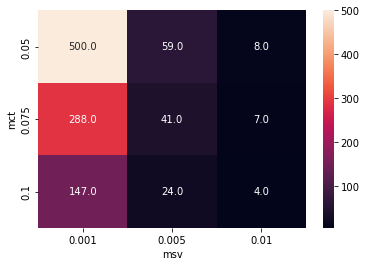

In [4]:
import seaborn as sns

msv =[ 0.001, 0.005, 0.01]
mct =[ 0.05, 0.075, 0.1]

heatmap_data = pd.DataFrame({
    'msv': [i for i in msv for _ in mct],
    'mct': mct * len(msv),
    'count': [len(association_rules(apriori(df, min_support=i, use_colnames=True), metric="confidence", min_threshold=j)) 
              for i in msv for j in mct]
})
print(heatmap_data)
heatmap_data = heatmap_data.pivot("mct", "msv", "count")
sns.heatmap(heatmap_data, annot=True, fmt=".1f")

In [6]:
seta = df.iloc[:len(df)//2]
setb = df.iloc[len(df)//2:]

items = apriori(seta, min_support=0.005, use_colnames=True)
rules1 = association_rules(items, metric="confidence", min_threshold=0.075)

items = apriori(setb, min_support=0.005, use_colnames=True)
rules2 = association_rules(items, metric="confidence", min_threshold=0.075)

common_rules = pd.merge(rules1, rules2,on=['antecedents', 'consequents'])


In [7]:
rules1

antecedents         consequents  antecedent support  \
0       (bottled beer)  (other vegetables)             0.04450   
1       (bottled beer)        (whole milk)             0.04450   
2      (bottled water)  (other vegetables)             0.06375   
3      (bottled water)              (soda)             0.06375   
4      (bottled water)        (whole milk)             0.06375   
5        (brown bread)        (whole milk)             0.03600   
6             (butter)        (whole milk)             0.03450   
7        (canned beer)        (whole milk)             0.04475   
8       (citrus fruit)  (other vegetables)             0.05375   
9       (citrus fruit)        (whole milk)             0.05375   
10      (citrus fruit)            (yogurt)             0.05375   
11     (domestic eggs)        (whole milk)             0.03300   
12       (frankfurter)  (other vegetables)             0.03900   
13         (margarine)        (whole milk)             0.03750   
14         (pip fruit)  (other vegetables)             0.04925   
15        (rolls/buns)  (other vegetables)             0.11025   
16  (other vegetables)        (rolls/buns)             0.11850   
17           (sausage)  (other vegetables)             0.05900   
18  (other vegetables)              (soda)             0.11850   
19              (soda)  (other vegetables)             0.10300   
20    (tropical fruit)  (other vegetables)             0.06725   
21  (other vegetables)        (whole milk)             0.11850   
22        (whole milk)  (other vegetables)             0.15575   
23            (yogurt)  (other vegetables)             0.07800   
24            (pastry)        (whole milk)             0.05200   
25         (pip fruit)              (soda)             0.04925   
26         (pip fruit)        (whole milk)             0.04925   
27              (pork)        (whole milk)             0.03575   
28           (sausage)        (rolls/buns)             0.05900   
29              (soda)        (rolls/buns)             0.10300   
30    (tropical fruit)        (rolls/buns)             0.06725   
31        (rolls/buns)        (whole milk)             0.11025   
32        (whole milk)        (rolls/buns)             0.15575   
33   (root vegetables)              (soda)             0.06975   
34   (root vegetables)        (whole milk)             0.06975   
35           (sausage)              (soda)             0.05900   
36           (sausage)        (whole milk)             0.05900   
37     (shopping bags)        (whole milk)             0.04450   
38        (whole milk)              (soda)             0.15575   
39              (soda)        (whole milk)             0.10300   
40    (tropical fruit)        (whole milk)             0.06725   
41            (yogurt)        (whole milk)             0.07800   

    consequent support  support  confidence      lift  leverage  conviction  \
0              0.11850  0.00525    0.117978  0.995591 -0.000023    0.999408   
1              0.15575  0.00625    0.140449  0.901762 -0.000681    0.982199   
2              0.11850  0.00525    0.082353  0.694962 -0.002304    0.960609   
3              0.10300  0.00550    0.086275  0.837617 -0.001066    0.981695   
4              0.15575  0.00625    0.098039  0.629465 -0.003679    0.936016   
5              0.15575  0.00575    0.159722  1.025504  0.000143    1.004727   
6              0.15575  0.00525    0.152174  0.977040 -0.000123    0.995782   
7              0.15575  0.00550    0.122905  0.789117 -0.001470    0.962553   
8              0.11850  0.00625    0.116279  0.981258 -0.000119    0.997487   
9              0.15575  0.00725    0.134884  0.866027 -0.001122    0.975880   
10             0.07800  0.00550    0.102326  1.311866  0.001307    1.027098   
11             0.15575  0.00600    0.181818  1.167372  0.000860    1.031861   
12             0.11850  0.00550    0.141026  1.190090  0.000878    1.026224   
13             0.15575  0.00525    0.140000  0.898876 -0.000591   

In [8]:
rules2

antecedents         consequents  antecedent support  \
0            (bottled beer)        (whole milk)             0.04125   
1           (bottled water)  (other vegetables)             0.05675   
2           (bottled water)        (whole milk)             0.05675   
3             (canned beer)        (whole milk)             0.04650   
4            (citrus fruit)        (rolls/buns)             0.05175   
5            (citrus fruit)        (whole milk)             0.05175   
6            (citrus fruit)            (yogurt)             0.05175   
7             (frankfurter)  (other vegetables)             0.03725   
8             (frankfurter)        (whole milk)             0.03725   
9       (frozen vegetables)        (whole milk)             0.02675   
10  (fruit/vegetable juice)        (whole milk)             0.03825   
11             (newspapers)        (whole milk)             0.03650   
12              (pip fruit)  (other vegetables)             0.04950   
13             (rolls/buns)  (other vegetables)             0.11150   
14       (other vegetables)        (rolls/buns)             0.12275   
15        (root vegetables)  (other vegetables)             0.07175   
16                (sausage)  (other vegetables)             0.06375   
17          (shopping bags)  (other vegetables)             0.04950   
18                   (soda)  (other vegetables)             0.09750   
19         (tropical fruit)  (other vegetables)             0.06725   
20       (other vegetables)        (whole milk)             0.12275   
21       (other vegetables)            (yogurt)             0.12275   
22                 (yogurt)  (other vegetables)             0.09175   
23                 (pastry)        (whole milk)             0.04975   
24              (pip fruit)        (whole milk)             0.04950   
25                   (pork)        (whole milk)             0.03725   
26        (root vegetables)        (rolls/buns)             0.07175   
27                (sausage)        (rolls/buns)             0.06375   
28             (rolls/buns)              (soda)             0.11150   
29                   (soda)        (rolls/buns)             0.09750   
30             (rolls/buns)        (whole milk)             0.11150   
31             (whole milk)        (rolls/buns)             0.15600   
32             (rolls/buns)            (yogurt)             0.11150   
33                 (yogurt)        (rolls/buns)             0.09175   
34        (root vegetables)        (whole milk)             0.07175   
35                (sausage)              (soda)             0.06375   
36                (sausage)        (whole milk)             0.06375   
37          (shopping bags)        (whole milk)             0.04950   
38         (tropical fruit)              (soda)             0.06725   
39             (whole milk)              (soda)             0.15600   
40                   (soda)        (whole milk)             0.09750   
41                 (yogurt)              (soda)             0.09175   
42         (tropical fruit)        (whole milk)             0.06725   
43                 (yogurt)        (whole milk)             0.09175   
44             (whole milk)            (yogurt)             0.15600   

    consequent support  support  confidence      lift  leverage  conviction  \
0              0.15600  0.00725    0.175758  1.126651  0.000815    1.023971   
1              0.12275  0.00725    0.127753  1.040760  0.000284    1.005736   
2              0.15600  0.00650    0.114537  0.734214 -0.002353    0.953174   
3              0.15600  0.00725    0.155914  0.999449 -0.000004    0.999898   
4              0.11150  0.00550    0.106280  0.953186 -0.000270    0.994159   
5              0.15600  0.00825    0.159420  1.021925  0.000177    1.004069   
6              0.09175  0.00500    0.096618  1.053061  0.000252    1.005389   
7              0.12275  0.00500    0.134228  1.093509  0.000428    1.013258   
8              0.15600  0.00500    0.1

In [9]:
common_rules

antecedents         consequents  antecedent support_x  \
0       (bottled beer)        (whole milk)               0.04450   
1      (bottled water)  (other vegetables)               0.06375   
2      (bottled water)        (whole milk)               0.06375   
3        (canned beer)        (whole milk)               0.04475   
4       (citrus fruit)        (whole milk)               0.05375   
5       (citrus fruit)            (yogurt)               0.05375   
6        (frankfurter)  (other vegetables)               0.03900   
7          (pip fruit)  (other vegetables)               0.04925   
8         (rolls/buns)  (other vegetables)               0.11025   
9   (other vegetables)        (rolls/buns)               0.11850   
10           (sausage)  (other vegetables)               0.05900   
11              (soda)  (other vegetables)               0.10300   
12    (tropical fruit)  (other vegetables)               0.06725   
13  (other vegetables)        (whole milk)               0.11850   
14            (yogurt)  (other vegetables)               0.07800   
15            (pastry)        (whole milk)               0.05200   
16         (pip fruit)        (whole milk)               0.04925   
17              (pork)        (whole milk)               0.03575   
18           (sausage)        (rolls/buns)               0.05900   
19              (soda)        (rolls/buns)               0.10300   
20        (rolls/buns)        (whole milk)               0.11025   
21        (whole milk)        (rolls/buns)               0.15575   
22   (root vegetables)        (whole milk)               0.06975   
23           (sausage)              (soda)               0.05900   
24           (sausage)        (whole milk)               0.05900   
25     (shopping bags)        (whole milk)               0.04450   
26        (whole milk)              (soda)               0.15575   
27              (soda)        (whole milk)               0.10300   
28    (tropical fruit)        (whole milk)               0.06725   
29            (yogurt)        (whole milk)               0.07800   

    consequent support_x  support_x  confidence_x    lift_x  leverage_x  \
0                0.15575    0.00625      0.140449  0.901762   -0.000681   
1                0.11850    0.00525      0.082353  0.694962   -0.002304   
2                0.15575    0.00625      0.098039  0.629465   -0.003679   
3                0.15575    0.00550      0.122905  0.789117   -0.001470   
4                0.15575    0.00725      0.134884  0.866027   -0.001122   
5                0.07800    0.00550      0.102326  1.311866    0.001307   
6                0.11850    0.00550      0.141026  1.190090    0.000878   
7                0.11850    0.00675      0.137056  1.156589    0.000914   
8                0.11850    0.00975      0.088435  0.746290   -0.003315   
9                0.11025    0.00975      0.082278  0.746290   -0.003315   
10               0.11850    0.00675      0.114407  0.965458   -0.000241   
11               0.11850    0.00975      0.094660  0.798820   -0.002455   
12               0.11850    0.00600      0.089219  0.752906   -0.001969   
13               0.15575    0.01500      0.126582  0.812727   -0.003456   
14               0.11850    0.00825      0.105769  0.892567   -0.000993   
15               0.15575    0.00700      0.134615  0.864304   -0.001099   
16               0.15575    0.00725      0.147208  0.945156   -0.000421   
17               0.15575    0.00550      0.153846  0.987776   -0.000068   
18               0.11025    0.00675      0.114407  1.037703    0.000245   
19               0.11025    0.00775      0.075243  0.682474   -0.003606   
20               0.15575    0.01325      0.120181  0.771630   -0.003921   
21               0.11025    0.01325      0.085072  0.771630   -0.003921   
22               0.15575    0.00675      0.096774  0.621343   -0.004114   
23               0.10300    0.00650      0.110169  1.069607    0.000423   
24               0.15575   

In [24]:
directory= r'C:\Users\HP\Downloads\dataas3\Cropped'

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.2812 - loss: 2.9034 - val_accuracy: 0.3677 - val_loss: 1.3337
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4166 - loss: 1.3066 - val_accuracy: 0.3871 - val_loss: 1.2865
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4636 - loss: 1.2179 - val_accuracy: 0.4065 - val_loss: 1.2706
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5215 - loss: 1.1247 - val_accuracy: 0.4194 - val_loss: 1.2414
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6130 - loss: 1.0657 - val_accuracy: 0.3742 - val_loss: 1.3386
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4933 - loss: 1.1110 - val_accuracy: 0.4387 - val_loss: 1.2373
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6298 - loss: 0.9760 - val_accuracy: 0.4645 - val_loss: 1.2271
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6683 - loss: 0.9077 - val_accuracy: 0.4387 - v

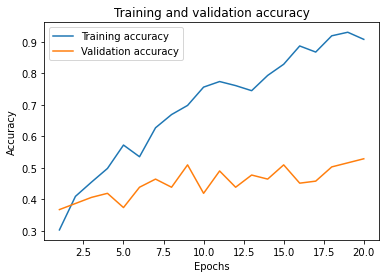

In [25]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define the image dimensions
img_height = 128
img_width = 128


dir1 = r'C:\Users\HP\Downloads\dataas3\Cropped\n02097209-standard_schnauzer'
dir2 = r'C:\Users\HP\Downloads\dataas3\Cropped\n02092002-Scottish_deerhound'
dir3 = r'C:\Users\HP\Downloads\dataas3\Cropped\n02092339-Weimaraner'
dir4 = r'C:\Users\HP\Downloads\dataas3\Cropped\n02108422-bull_mastiff'

def plot_learning_curves(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc , label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def load_images_and_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = load_img(os.path.join(directory, filename), target_size=(img_height, img_width))
            img_array = img_to_array(img)
            images.append(img_array)
            if directory == dir1:
                labels.append(0)
            elif directory == dir2:
                labels.append(1)
            elif directory == dir3:
                labels.append(2)
            elif directory == dir4:
                labels.append(3)
    return images, labels

class1_img, class1_l = load_images_and_labels(dir1)
class2_img, class2_l = load_images_and_labels(dir2)
class3_img, class3_l = load_images_and_labels(dir3)
class4_img, class4_l = load_images_and_labels(dir4)

images = np.concatenate([class1_img, class2_img, class3_img, class4_img], axis=0)
labels = np.concatenate([class1_l, class2_l, class3_l, class4_l], axis=0)

labels = to_categorical(labels)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_learning_curves(history)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2431 - loss: 1.4050 - val_accuracy: 0.3032 - val_loss: 1.3856
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3432 - loss: 1.3846 - val_accuracy: 0.3032 - val_loss: 1.3849
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3211 - loss: 1.3837 - val_accuracy: 0.3032 - val_loss: 1.3842
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3159 - loss: 1.3826 - val_accuracy: 0.3032 - val_loss: 1.3836
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3135 - loss: 1.3813 - val_accuracy: 0.3032 - val_loss: 1.3831
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3006 - loss: 1.3813 - val_accuracy: 0.3032 - val_loss: 1.3827
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3032 - loss: 1.3818 - val_accuracy: 0.3032 - val_loss: 1.3823
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3035 - loss: 1.3799 - val_accuracy: 0.3032 - v

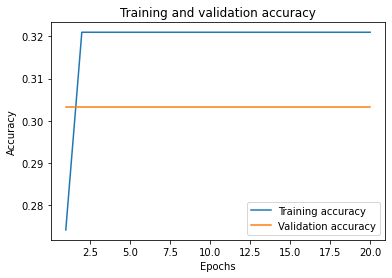

In [28]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_learning_curves(history)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2386 - loss: 2.2905 - val_accuracy: 0.2968 - val_loss: 1.3709
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3326 - loss: 1.3420 - val_accuracy: 0.2903 - val_loss: 1.3591
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3702 - loss: 1.3318 - val_accuracy: 0.2839 - val_loss: 1.3753
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3583 - loss: 1.3056 - val_accuracy: 0.3419 - val_loss: 1.3351
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3938 - loss: 1.2394 - val_accuracy: 0.3032 - val_loss: 1.3646
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3702 - loss: 1.2378 - val_accuracy: 0.3355 - val_loss: 1.3088
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3881 - loss: 1.1937 - val_accuracy: 0.2968 - val_loss: 1.3490
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3910 - loss: 1.1784 - val_accuracy: 0.3032 - v

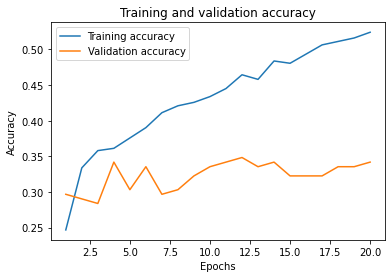

In [21]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_learning_curves(history)